In [1]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import sklearn as skl

In [2]:
df_2022=pd.read_excel(Path("../Resources/ttc-delay-data-2022.xlsx"))
df_2023=pd.read_excel(Path("../Resources/ttc-delay-data-2023.xlsx"))

In [3]:
df_2022 = df_2022.rename(columns={'Date': 'Dates'})
df_2023 = df_2023.rename(columns={'Date': 'Dates'})

In [4]:
len(df_2023)

34981

In [5]:
len(df_2022)

58707

In [6]:
df_2022.dtypes

Dates        datetime64[ns]
Route                object
Time                 object
Day                  object
Location             object
Incident             object
Min Delay             int64
Min Gap               int64
Direction            object
Vehicle               int64
dtype: object

In [7]:
df_2023.dtypes

Dates        datetime64[ns]
Route                object
Time                 object
Day                  object
Location             object
Incident             object
Min Delay             int64
Min Gap               int64
Direction            object
Vehicle               int64
dtype: object

In [8]:
df_2022['Route'] = pd.to_numeric(df_2022['Route'], errors='coerce')

In [9]:
df_2023['Route'] = pd.to_numeric(df_2023['Route'], errors='coerce')

In [10]:
df_2022['Year'] = df_2022['Dates'].dt.year
df_2022['Month'] = df_2022['Dates'].dt.month
df_2022['Date'] = df_2022['Dates'].dt.day
# df_2022['Hour'] = pd.to_datetime(df_2022['Time']).dt.hour
# df['Minute'] = pd.to_datetime(df['Time']).dt.minute

In [11]:
df_2023['Year'] = df_2023['Dates'].dt.year
df_2023['Month'] = df_2023['Dates'].dt.month
df_2023['Date'] = df_2023['Dates'].dt.day
# df_2022['Hour'] = pd.to_datetime(df_2022['Time']).dt.hour
# df['Minute'] = pd.to_datetime(df['Time']).dt.minute

In [12]:
df_2022['Hour'] = df_2022['Time'].astype(str).str.split(':').str[0].astype(int)
df_2022['Minute'] = df_2022['Time'].astype(str).str.split(':').str[1].astype(int)

# Normalize 'Time' to minutes since midnight

In [13]:
df_2023['Hour'] = df_2023['Time'].astype(str).str.split(':').str[0].astype(int)
df_2023['Minute'] = df_2023['Time'].astype(str).str.split(':').str[1].astype(int)

In [14]:
df_2022

,Dates,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Year,Month,Date,Hour,Minute
0,2022-01-01,320.0,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531,2022,1,1,2,0
1,2022-01-01,325.0,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658,2022,1,1,2,0
2,2022-01-01,320.0,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,S,0,2022,1,1,2,0
3,2022-01-01,320.0,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,S,0,2022,1,1,2,7
4,2022-01-01,320.0,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,S,0,2022,1,1,2,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58702,2022-12-31,32.0,23:21,Saturday,EGLINTON AND EDITH (W,Mechanical,2,24,W,1085,2022,12,31,23,21
58703,2022-12-31,113.0,23:28,Saturday,DANFORTH AND DAWES,Vision,20,40,W,8589,2022,12,31,23,28
58704,2022-12-31,72.0,23:56,Saturday,LOWER SHERBOURNE AND L,Security,18,36,N,8493,2022,12,31,23,56
58705,2022-12-31,22.0,00:17,Saturday,BINGHAM LOOP,Cleaning - Unsanitary,10,20,S,8582,2022,12,31,0,17


In [15]:
df_2022=df_2022.drop(columns=["Dates","Time"])

In [16]:
df_2023=df_2023.drop(columns=["Dates","Time"])

In [17]:
df_2022=df_2022.dropna()

In [18]:
df_2023=df_2023.dropna()

In [19]:
len(df_2022)

48035

In [20]:
len(df_2023)

28253

In [21]:
df_2022

,Route,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Year,Month,Date,Hour,Minute
1,325.0,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658,2022,1,1,2,0
2,320.0,Saturday,YONGE AND STEELES,Operations - Operator,17,20,S,0,2022,1,1,2,0
3,320.0,Saturday,YONGE AND STEELES,Operations - Operator,4,11,S,0,2022,1,1,2,7
4,320.0,Saturday,YONGE AND STEELES,Operations - Operator,4,8,S,0,2022,1,1,2,13
6,96.0,Saturday,HUMBERLINE LOOP,Security,0,0,N,3536,2022,1,1,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58702,32.0,Saturday,EGLINTON AND EDITH (W,Mechanical,2,24,W,1085,2022,12,31,23,21
58703,113.0,Saturday,DANFORTH AND DAWES,Vision,20,40,W,8589,2022,12,31,23,28
58704,72.0,Saturday,LOWER SHERBOURNE AND L,Security,18,36,N,8493,2022,12,31,23,56
58705,22.0,Saturday,BINGHAM LOOP,Cleaning - Unsanitary,10,20,S,8582,2022,12,31,0,17


In [22]:
df_2023

,Route,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Year,Month,Date,Hour,Minute
1,69.0,Sunday,WARDEN STATION,Security,22,44,S,8407,2023,1,1,2,34
2,35.0,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051,2023,1,1,3,6
7,52.0,Sunday,LAWRENCE AND YONGE,Emergency Services,30,60,E,3520,2023,1,1,4,25
8,24.0,Sunday,DANFORTH AND MAIN,Cleaning - Unsanitary,20,40,W,8404,2023,1,1,4,35
10,36.0,Sunday,FINCH STATION,Cleaning - Unsanitary,11,26,W,3561,2023,1,1,5,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34974,7.0,Thursday,BATHURST AND EGLINTON,Road Blocked - NON-TTC Collision,10,20,S,9010,2023,8,31,0,18
34976,36.0,Thursday,FINCH AND HIGHWAY 27,Collision - TTC,10,20,W,9120,2023,8,31,0,49
34977,36.0,Thursday,FINCH AND HIGHWAY 27,Diversion,0,0,W,9120,2023,8,31,1,10
34979,24.0,Thursday,VICTORIA PARK AND ELLE,Investigation,10,20,S,8599,2023,8,31,1,23


In [23]:
df_2022 = df_2022[df_2022['Direction'].isin(['N', 'S', 'E', 'W'])]

In [24]:
df_2023 = df_2023[df_2023['Direction'].isin(['N', 'S', 'E', 'W'])]

In [37]:
# result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# # Export the DataFrame to a CSV file
# result_df.to_csv('actual_vs_predicted_classification.csv', index=False)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Training data (df_2022)
X_train = df_2022[['Route', 'Day', 'Location', 'Min Delay', 'Min Gap', 'Direction', 'Vehicle', 'Year', 'Month', 'Date', 'Hour', 'Minute']]
y_train = df_2022['Incident']

# Identify categorical features
categorical_features = ['Day', 'Location', 'Direction']

# One-hot encode categorical features
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)

# Testing data (df_2023)
X_test = df_2023[['Route', 'Day', 'Location', 'Min Delay', 'Min Gap', 'Direction', 'Vehicle', 'Year', 'Month', 'Date', 'Hour', 'Minute']]
y_test = df_2023['Incident'] 
# One-hot encode categorical features in X_test
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# Ensure columns in X_train and X_test match
common_columns = set(X_train_encoded.columns) & set(X_test_encoded.columns)
X_train_final = X_train_encoded[common_columns]
X_test_final = X_test_encoded[common_columns]

# Define the classifier
classifier = RandomForestClassifier(random_state=42)

# Fit the model
classifier.fit(X_train_final, y_train)

# Make predictions
y_pred = classifier.predict(X_test_final)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy: {accuracy}")

Accuracy: 0.3854140827102307


In [30]:
# predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# # Print the DataFrame
# print(predictions_df)
dates = X_test['Date']
months = X_test['Month']
routes = X_test['Route']
day=X_test['Day']

# Create a DataFrame with actual, predicted values, date, month, and route
predictions_df = pd.DataFrame({
    'Date': dates,
    'Month': months,
    'Route': routes,
    'Actual': y_test,
    'Predicted': y_pred,
    'Day': day,
    'Year':X_test['Year']
})

# Print the DataFrame
# Save the DataFrame to a CSV file
predictions_df.to_csv('incident_2023_predicted.csv', index=False)

In [31]:
# dates = df_encoded_2023['Date']

# # Create a DataFrame with actual and predicted values along with dates
# result_df = pd.DataFrame({
#     'Date': dates,
#     'Actual': df_encoded_2023['Min Delay'],
#     'Predicted': y_pred
# })

# # Print the DataFrame
# print(result_df)

In [32]:
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
                                  precision    recall  f1-score   support

           Cleaning - Unsanitary       0.33      0.00      0.01      1126
                 Collision - TTC       0.19      0.04      0.06      2211
                       Diversion       0.76      0.63      0.69      1703
              Emergency Services       0.24      0.05      0.08      1419
                   General Delay       0.33      0.04      0.07      1604
                         Held By       0.00      0.00      0.00        38
                   Investigation       0.09      0.01      0.01       655
                      Mechanical       0.45      0.62      0.52     10465
           Operations - Operator       0.27      0.58      0.36      4871
Road Blocked - NON-TTC Collision       0.00      0.00      0.00       170
                        Security       0.40      0.08      0.14      2408
              Utilized Off Route       0.25      0.02      0.04      1200
              

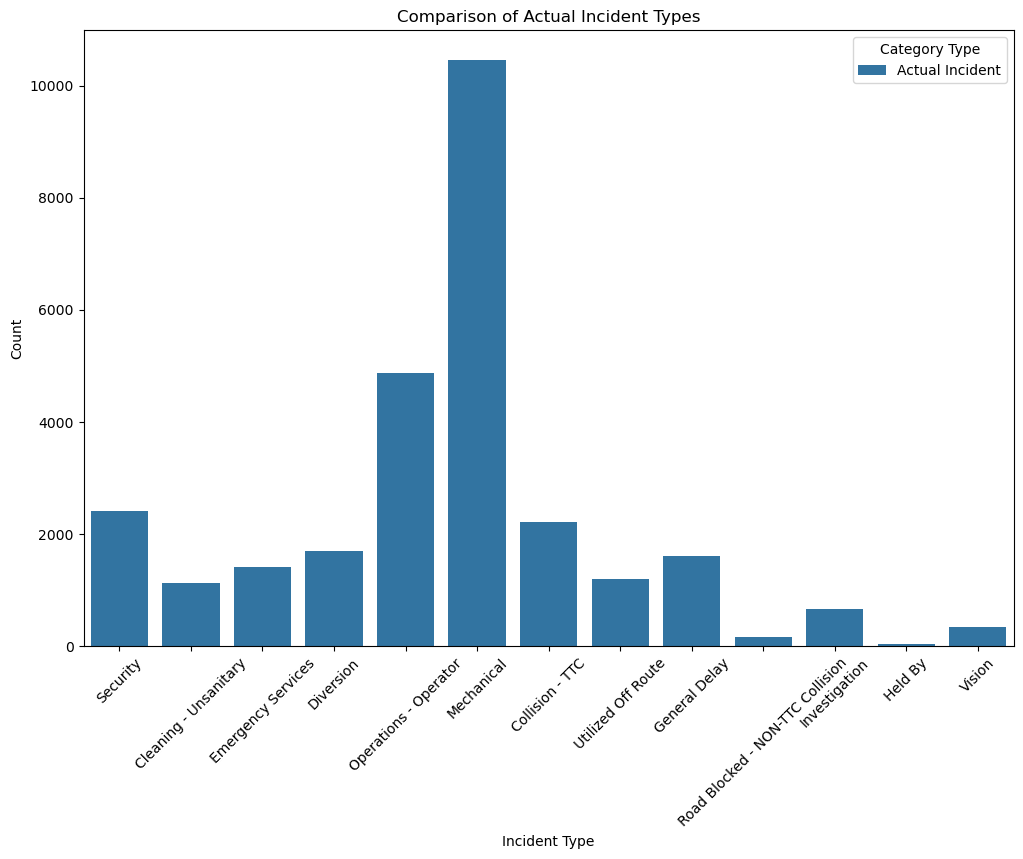

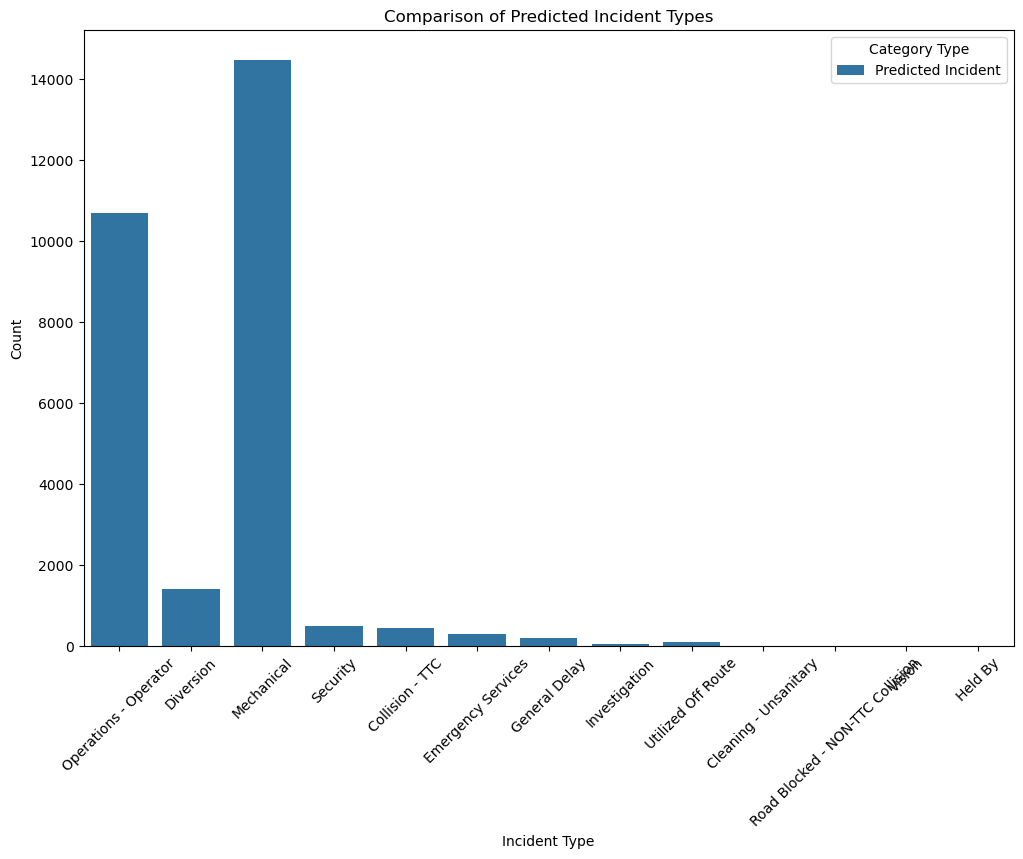

In [35]:
actual_df = pd.DataFrame({
    'Date': df_2023['Date'],
    'Route': df_2023['Route'],
    'Actual Incident': y_test,
})

predicted_df = pd.DataFrame({
    'Date': df_2023['Date'],
    'Route': df_2023['Route'],
    'Predicted Incident': y_pred,
})

# Melt the DataFrames for easier visualization
melted_actual = pd.melt(actual_df, id_vars=['Date', 'Route'],
                        var_name='Category Type', value_name='Incident Type')
melted_predicted = pd.melt(predicted_df, id_vars=['Date', 'Route'],
                           var_name='Category Type', value_name='Incident Type')

# Create a bar plot for actual and predicted incident types
plt.figure(figsize=(12, 8))
sns.countplot(x='Incident Type', hue='Category Type', data=melted_actual)
plt.title('Comparison of Actual Incident Types')
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(x='Incident Type', hue='Category Type', data=melted_predicted)
plt.title('Comparison of Predicted Incident Types')
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()